In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

#EDA

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue']

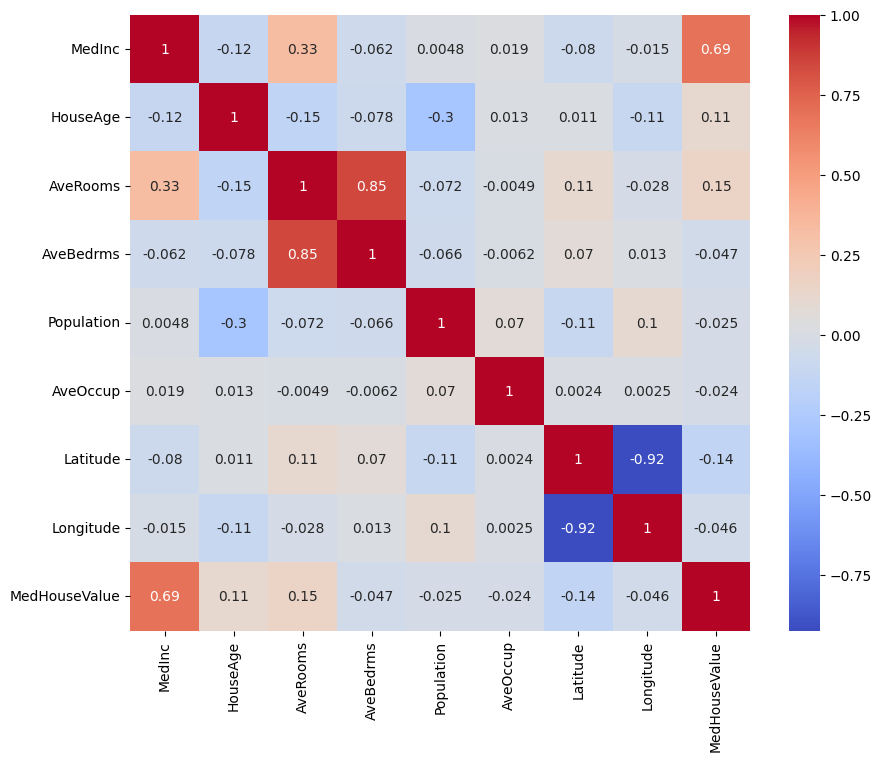

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

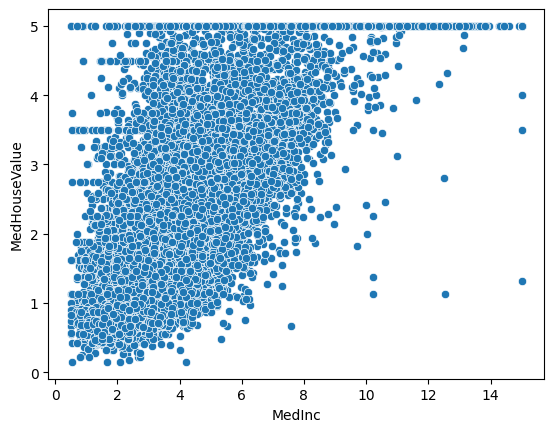

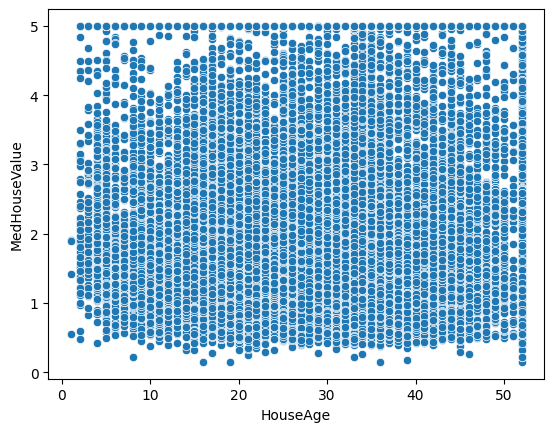

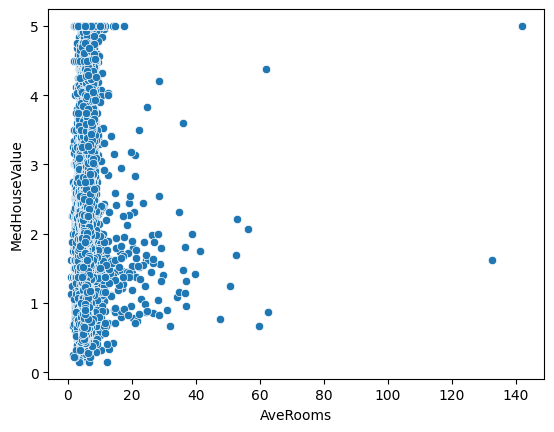

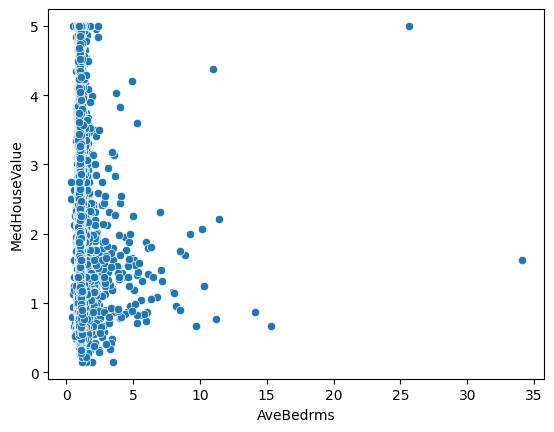

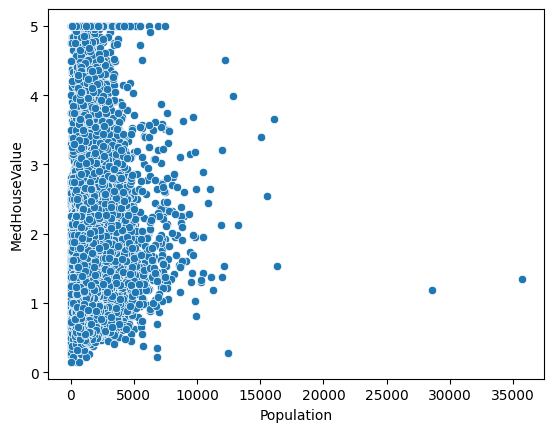

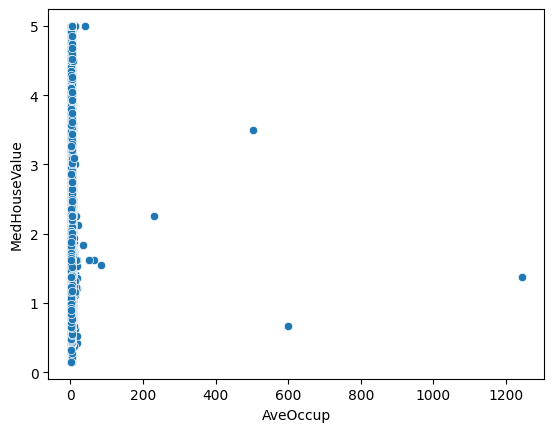

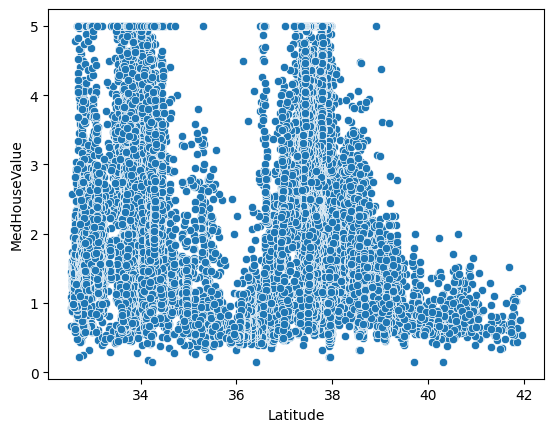

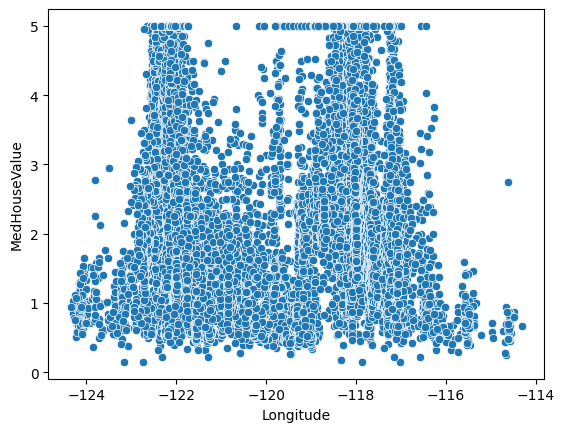

In [9]:
for label in cols[:-1]:
  sns.scatterplot(x=label,y='MedHouseValue',data=df)
  plt.show()

#data processing

In [10]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


<Axes: >

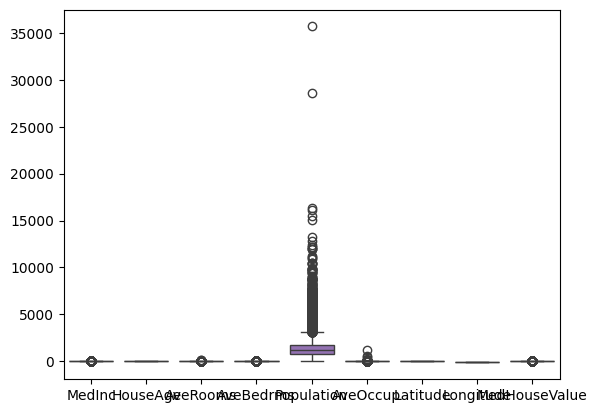

In [11]:
sns.boxplot(data=df)

#feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('MedHouseValue', axis =1))

#Train - test Split

In [18]:
x = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#linear Regression

In [30]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

#Ridge Regression

In [29]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train,y_train)
y_pred_ridge = ridge_reg.predict(x_test)

#Model Evaluation

In [32]:
print('Linear Regression MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression R2 Score: ', r2_score(y_test, y_pred_lr))

print('Ridge Regression MSE :', mean_squared_error(y_test, y_pred_ridge))
print('Ridge Regression MAE :', mean_absolute_error(y_test, y_pred_ridge))
print('Ridge Regression R2 Score :', r2_score(y_test, y_pred_ridge))

Linear Regression MSE:  0.5558915986952444
Linear Regression MAE:  0.5332001304956553
Linear Regression R2 Score:  0.5757877060324508
Ridge Regression MSE : 0.5558034669932211
Ridge Regression MAE : 0.5332039182571153
Ridge Regression R2 Score : 0.5758549611440126


#applying hyperparameter tuning (Ridge Regression)

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'alpha':[0.1,1.0,10.0,100.0]}
ridge_cv = GridSearchCV(Ridge(),param_grid,cv=5)
ridge_cv.fit(x_train,y_train)
print('Best alpha:',ridge_cv.best_params_)

Best alpha: {'alpha': 10.0}


In [37]:
best_ridge_reg = Ridge(alpha=ridge_cv.best_params_['alpha'])
best_ridge_reg.fit(x_train,y_train)
best_y_pred_ridge = ridge_reg.predict(x_test)

In [38]:
print('Ridge Regression MSE :', mean_squared_error(y_test, best_y_pred_ridge))
print('Ridge Regression MAE :', mean_absolute_error(y_test, best_y_pred_ridge))
print('Ridge Regression R2 Score :', r2_score(y_test, best_y_pred_ridge))

Ridge Regression MSE : 0.5558034669932211
Ridge Regression MAE : 0.5332039182571153
Ridge Regression R2 Score : 0.5758549611440126


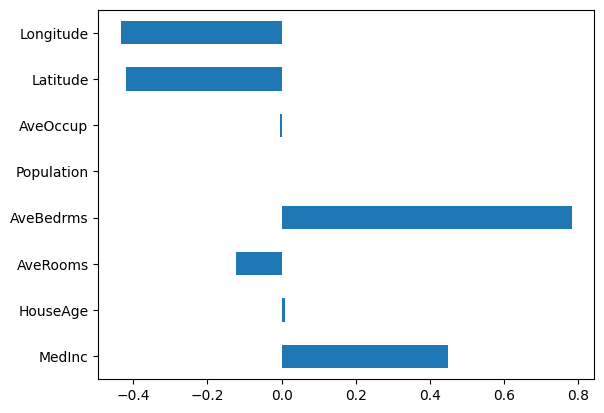

In [47]:
feature_importance = pd.Series(lr.coef_, index=x.columns)
feature_importance.plot(kind='barh')
plt.show()


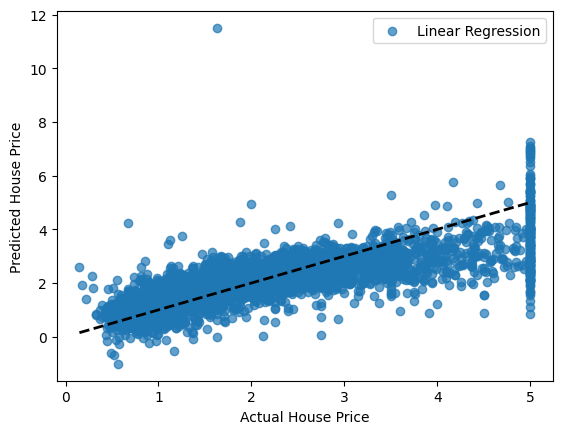

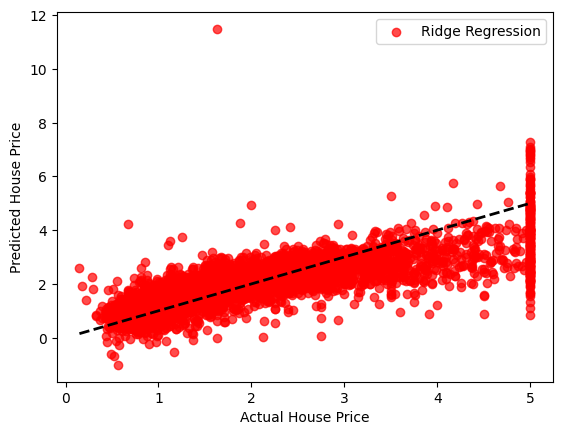

In [46]:
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.show()
plt.scatter(y_test, best_y_pred_ridge, label="Ridge Regression", alpha=0.7, color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.show()
